In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df=pd.read_csv('ababab.csv',index_col='date' ,parse_dates=True)
df=df.dropna()
df.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2016-05-04,34,41,27,35.0,36.0,34.0,6.0,4.0,-1.0,1006.00,...,-10.0,1009.0,1008.0,1009.0,1000.0,1001.0,999.0,0.0,0.0,0.0
2016-05-05,31,38,24,34.0,35.0,36.0,7.0,6.0,4.0,1005.65,...,-2.0,1008.0,1009.0,1008.0,1001.0,1000.0,1001.0,0.0,0.0,0.0
2016-05-06,28,34,21,31.0,34.0,35.0,11.0,7.0,6.0,1007.94,...,-2.0,1011.0,1008.0,1009.0,1003.0,1001.0,1000.0,5.0,0.0,0.0
2016-05-07,30,38,23,28.0,31.0,34.0,13.0,11.0,7.0,1008.39,...,0.0,1011.0,1011.0,1008.0,1004.0,1003.0,1001.0,0.0,5.0,0.0
2016-05-08,34,41,26,30.0,28.0,31.0,10.0,13.0,11.0,1007.62,...,6.0,1010.0,1011.0,1011.0,1002.0,1004.0,1003.0,0.0,0.0,5.0


In [89]:
features = ['meantempm', 'maxtempm','meanpressurem_1']
data = df[features].values

In [90]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [91]:
sequence_length = 30

In [92]:
# Prepare data for training
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length, :])
    y.append(data_scaled[i+sequence_length, :])  

X, y = np.array(X), np.array(y) 

In [93]:
# Split the dataset into training and testing sets
split = int(0.8 * len(data_scaled))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [94]:
# Define the model
model = Sequential()
model.add(LSTM(units=30, input_shape=(X.shape[1], X.shape[2]), activation="relu"))
model.add(Dense(8, activation="relu"))  
model.add(Dense(3)) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 30)                4080      
                                                                 
 dense_14 (Dense)            (None, 8)                 248       
                                                                 
 dense_15 (Dense)            (None, 3)                 27        
                                                                 
Total params: 4355 (17.01 KB)
Trainable params: 4355 (17.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
history = model.fit(X, y, epochs=50, batch_size=30, validation_split=0.1, verbose=1)

Epoch 1/50
28/28 [==============================] - 0s 17ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 2/50
28/28 [==============================] - 0s 16ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 3/50
28/28 [==============================] - 0s 14ms/step - loss: 0.0039 - val_loss: 0.0021
Epoch 4/50
28/28 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 5/50
28/28 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 6/50
28/28 [==============================] - 0s 13ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 7/50
28/28 [==============================] - 0s 13ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 8/50
28/28 [==============================] - 0s 13ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 9/50
28/28 [==============================] - 0s 13ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 10/50
28/28 [==============================] - 0s 13ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 11/

In [102]:
# Make predictions on the test set
test_predictions_scaled = model.predict(X_test)

# Inverse transform the entire test set for plotting
X_test_inverse = scaler.inverse_transform(X_test[:, -1, :])
y_test_inverse = scaler.inverse_transform(y_test)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

6/6 [==============================] - 0s 5ms/step


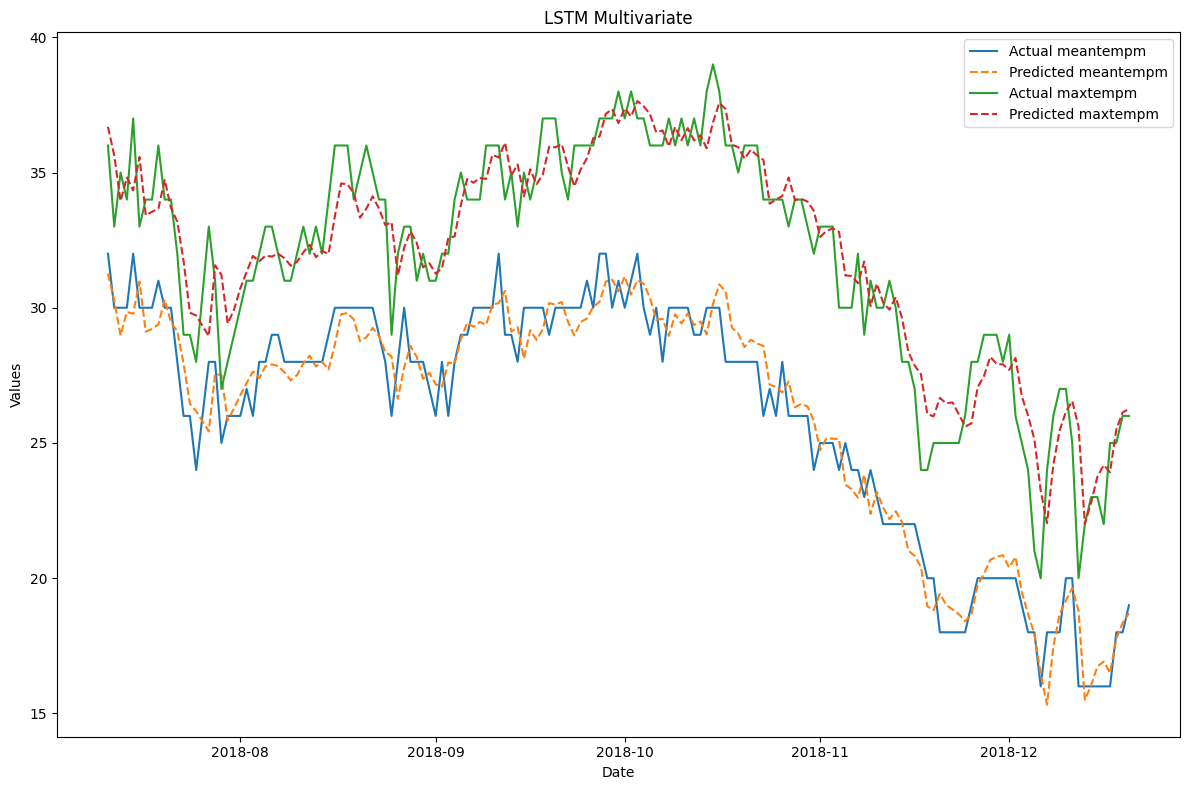

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot the results
for i in range(2):
    plt.plot(df.index[split+sequence_length:], y_test_inverse[:, i], label='Actual ' + features[i])
    plt.plot(df.index[split+sequence_length:], test_predictions[:, i], label='Predicted ' + features[i], linestyle='dashed')

plt.ylabel('Values')
plt.xlabel('Date')
plt.legend()
plt.title('LSTM Multivariate')
plt.tight_layout()
plt.show()

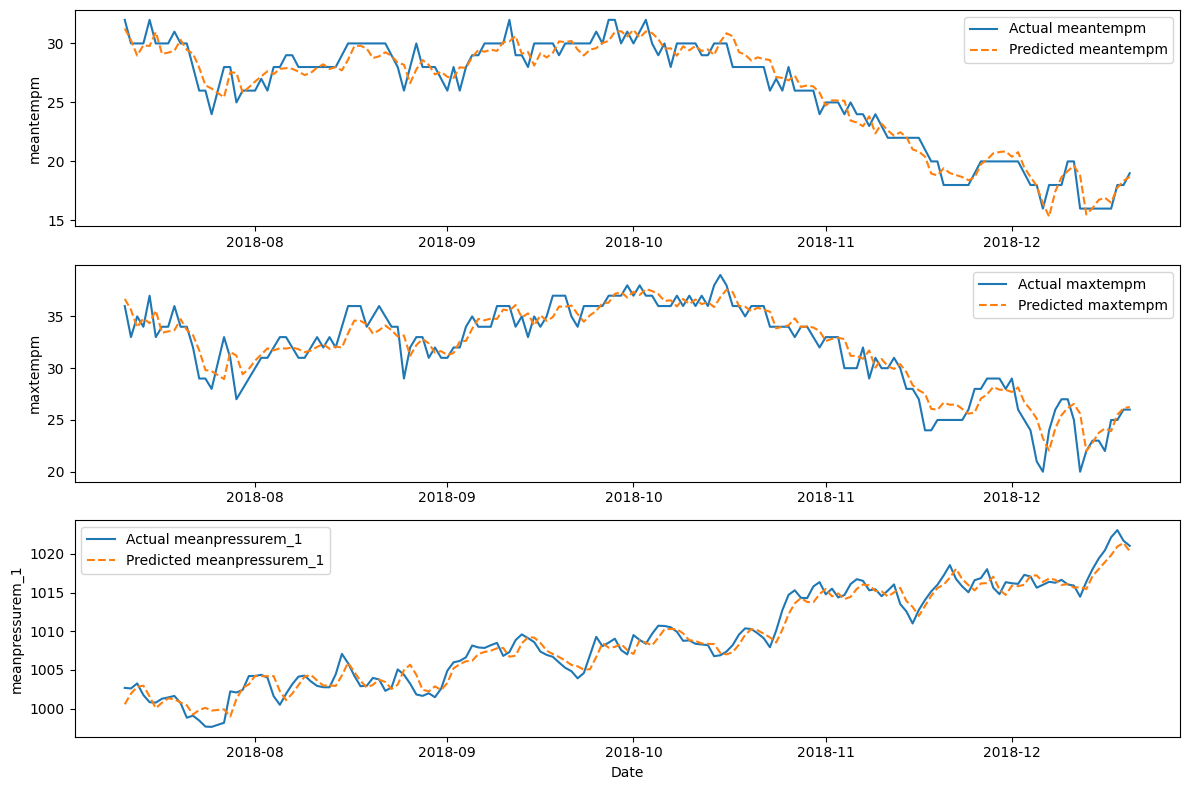

In [104]:
plt.figure(figsize=(12, 8))

# Plot the results
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(df.index[split+sequence_length:], y_test_inverse[:, i], label='Actual ' + features[i])
    plt.plot(df.index[split+sequence_length:], test_predictions[:, i], label='Predicted ' + features[i], linestyle='dashed')
    plt.ylabel(features[i])
    plt.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [105]:
# Calculate RMSE for each feature
rmse_per_feature = []
for i in range(3):
    rmse_feature = np.sqrt(mean_squared_error(y_test_inverse[:, i], test_predictions[:, i]))
    rmse_per_feature.append(rmse_feature)
    print("RMSE for", features[i], ":", rmse_feature)

RMSE for meantempm : 1.0315088382787612
RMSE for maxtempm : 1.467483356098635
RMSE for meanpressurem_1 : 1.1885199154981645


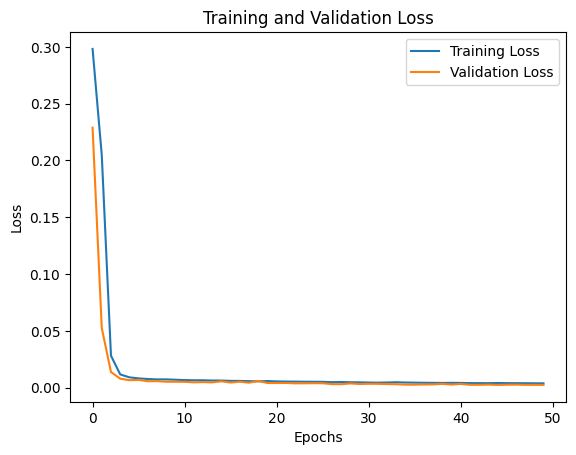

In [100]:
# Plot epochs vs loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()